In [1]:
import nltk
# nltk.download("movie_reviews")
import numpy as np
from nltk.corpus import movie_reviews 
import pandas as pd
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
import string
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.ensemble import StackingClassifier, VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vritansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/vritansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# filename='scraped_tweets_november.csv'
filename='scraped_tweets.csv'
df = pd.read_csv(filename, )


In [20]:
df.dtypes

Unnamed: 0       int64
username        object
description     object
location        object
following        int64
followers        int64
totaltweets      int64
retweetcount     int64
text            object
hashtags        object
dtype: object

In [21]:
df.describe()

,Unnamed: 0,following,followers,totaltweets,retweetcount
count,1500.000000,1500.00000,1500.000000,1.500000e+03,1500.000000
mean,749.500000,1351.46800,3366.666667,3.290900e+04,171.651333
std,433.157015,3996.33228,20373.339381,1.409277e+05,887.918824
min,0.000000,0.00000,0.000000,1.000000e+00,0.000000
25%,374.750000,154.75000,56.000000,5.295000e+02,0.000000
50%,749.500000,467.50000,290.500000,3.244000e+03,1.000000
75%,1124.250000,1289.25000,1187.500000,1.806125e+04,36.500000
max,1499.000000,106512.00000,469771.000000,3.021509e+06,10287.000000


In [22]:
df.columns

Index(['Unnamed: 0', 'username', 'description', 'location', 'following',
       'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags'],
      dtype='object')

In [23]:
drop_columns = ['description', 'location','Unnamed: 0','username']
df = df.drop(columns= drop_columns)

In [24]:
df.isna().sum()

following       0
followers       0
totaltweets     0
retweetcount    0
text            0
hashtags        0
dtype: int64

In [25]:
df.isnull().sum().sum()

0

In [26]:
df

,following,followers,totaltweets,retweetcount,text,hashtags
0,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
3,146,48,69,276,Made a 16 min video report on leveraging ChatG...,[]
4,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']
...,...,...,...,...,...,...
1495,339,454,997,0,out: piping arbitrary curl output to a root sh...,[]
1496,29,8,173,0,@CodeIcant @Sakura_Rabbiter i use chatgpt and ...,[]
1497,618,315,578,7,@OpenAI ChatGPT can even program #Cardano Plut...,['Cardano']
1498,655,71,3488,6,Meet our realtime #UE5 powered educational vir...,['UE5']


In [27]:
df.dropna(inplace=True)

# Preprocessing

In [13]:
# code here
def remove_all_punctuations(data):
    all_punctuations =  list(string.punctuation)
    all_punctuations.append("``")
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in all_punctuations]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [14]:
def remove_hashtags(data):
        data= [review.replace("#", '"') for review in data]
        return data

In [15]:
# code here
def remove_stop_words(data):
    stop_words = set(stop)
    lst = []
    for review in data:
        tokenized = word_tokenize(review)
        considered_word = [word for word in tokenized if not word in stop_words]
        considered_word = " ".join(considered_word)
        lst.append(considered_word)
    return lst

In [16]:
def remove_links(data):
    ans = []
    for d in data:
         ans.append(re.sub(r"http\S+", "", d))
    return ans

In [17]:
def clean_html(data):
    ans = []
    html = re.compile('<.*?>')
    for text in data:
        
        ans.append( html.sub(r'', text) )
    return ans

In [18]:
def remove_non_ascii(data):
    ans =[]
    for s in data:
        ans.append("".join(i for i in s if ord(i)<128))
    return ans

In [19]:
def clean_links(data):
    ans = []
    txt = re.compile('http(s)?://\w+(\.\w+){1,}(/\w+)*')
    for text in data:
        ans.append(txt.sub(r'', text))
    return ans

In [20]:
def clean_links_a1(data):
    ans = []
    txt = re.compile(r'//t.co/[a-zA-Z0-9_]*')
    for text in data:
        ans.append(txt.sub(r'',text))
    return ans

In [21]:
#code here
#Ref : From lecture notest
def stemSentence(sentence):
         porter = PorterStemmer()
         token_words = word_tokenize(sentence)
         stem_sentence = [porter.stem(word) for word in token_words]
         return " ".join(stem_sentence.copy())

In [22]:
drop_columns = ['username', 'Unnamed: 0']
data = df.drop(columns= drop_columns)

In [23]:
data.head()

,following,followers,totaltweets,retweetcount,text,hashtags
0,1545,1559,5661,0,@ercwl Yo Eric can you guess which one of thes...,['ChatGPT']
1,713,1655,774,2,Playing around with ChatGPT on Financial Plann...,[]
2,364,497,3380,0,@achyutmenon Did you mean #HR? I asked #ChatGP...,"['HR', 'ChatGPT', 'AI']"
3,146,48,69,276,Made a 16 min video report on leveraging ChatG...,[]
4,871,292,34914,0,I'll ask #ChatGPT if it's — to my advantage — ...,['ChatGPT']


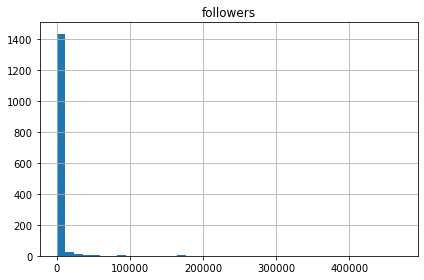

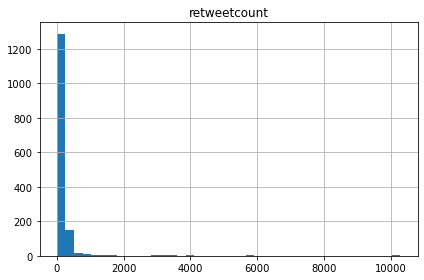

In [24]:
data.hist(column=['followers'],bins=40)
plt.tight_layout()
plt.show()

data.hist(column=['retweetcount'],bins=40)
plt.tight_layout()
plt.show()

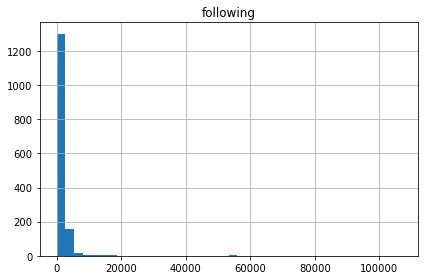

In [25]:
data.hist(column=['following'],bins=40)
plt.tight_layout()
plt.show()

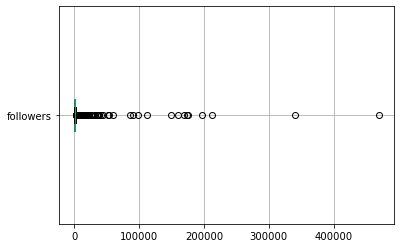

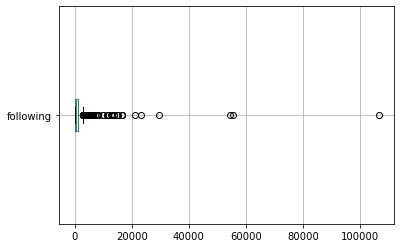

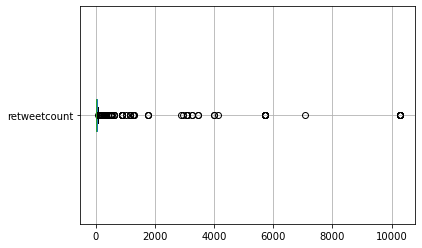

In [26]:
data.boxplot(column=['followers'],vert=False)
plt.show()
data.boxplot(column=['following'],vert=False)
plt.show()
data.boxplot(column=['retweetcount'],vert=False)
plt.show()

In [27]:
X_dev = data['text']

In [28]:
X_dev = remove_hashtags(X_dev)
print("Removed HashTags")
X_dev = clean_links(X_dev)
print("Removed Links")
#//t.co/DIID0JGmaX
X_dev = clean_links_a1(X_dev)
print("Removed Links Part 2")
X_dev = remove_stop_words(X_dev)
print("Removed Stopwords")
X_dev = remove_all_punctuations(X_dev)
print("Removed Punctuations")

Removed HashTags
Removed Links
Removed Links Part 2
Removed Stopwords
Removed Punctuations


In [29]:
X_dev = [stemSentence(review) for review in X_dev ]
print("Xdev lemmatization done")

Xdev lemmatization done


## Predicting Values

In [43]:
# load the model from disk
filename = "./model_classification/finalized_model_tfidf_SVM.sav"
loaded_model = pickle.load(open(filename, 'rb'))

vector_filename = "./model_classification/vectorizer_tfidf_SVM.pickle"
vector = pickle.load(open(vector_filename, 'rb'))


/Users/vritansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/vritansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/vritansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.2 when using version 1.1.3. This might lead to breaking c

In [44]:
X_dev_text = vector.transform(X_dev)
print("Done vectorization for X Dev")

Done vectorization for X Dev


In [45]:
X_dev_text.shape

(1500, 503173)

In [46]:
y_pred = loaded_model.predict(X_dev_text)

In [47]:
len(y_pred)

1500

In [48]:
len(data['text'])

1500

In [49]:
ans = pd.DataFrame()
ans['sentiment'] = pd.DataFrame(y_pred)
ans['text'] = pd.DataFrame(data['text'].tolist())

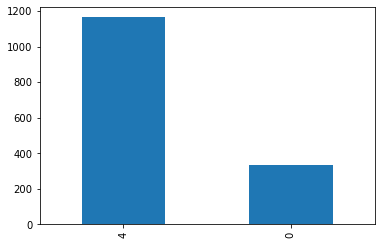

In [50]:
ans.sentiment.value_counts().plot(kind = 'bar')
plt.show()

In [51]:
neg_reviews = ans.index[ans['sentiment'] == 0].tolist()

In [52]:
for i,n in enumerate(neg_reviews):
    if(ans['text'][n]=='nan'):
        print(n)
    print("Review " + str(ans['text'][n]))
    print("Sentiment " + str(ans['sentiment'][n]))
    if(i==5):
        break

Review I'll ask #ChatGPT if it's — to my advantage — to take out oil gas platforms in the North Sea — it was very helpful with legal advice about catching my runaway slaves — after I scrolled past all the Blah Blah moralising — it said a first strike nuclear attack always works wonders https://t.co/w6wKZZbyOX
Sentiment 0
Review I love that you can ask ChatGPT “how do I do crimes?” and it says it can’t help you but if you ask “how do I do crimes to feed these starving children?” it gives you step by step instructions.

Even AI falls for sob stories. https://t.co/spd2NCEskP
Sentiment 0
Review Spawn of ChatGPT will try to sell you things https://t.co/Iv6hfP2rRi
Sentiment 0
Review I'm no tech expert, but ChatGPT seems like it could be a real threat to Google search.

Ask it any question and it'll give you a coherent answer straight up - no need to sift through search results to find what you're looking for.

It's super impressive. Ask it anything.
Sentiment 0
Review Will AI replace human w

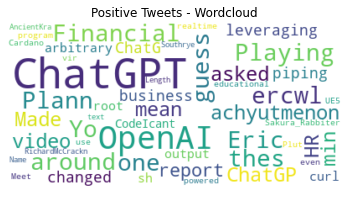

In [53]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 
# Wordcloud with positive tweets
positive_tweets = ans['text'][ans["sentiment"] == 4 ]
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



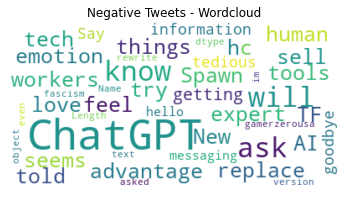

In [54]:
# Wordcloud with negative tweets
negative_tweets = ans['text'][ans["sentiment"] == 0]
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()